<br><br><br><br>

<CENTER><font size=12px, face = \"times new roman\">Modélisation Avancée</font></CENTER>

<br><br><br><br>

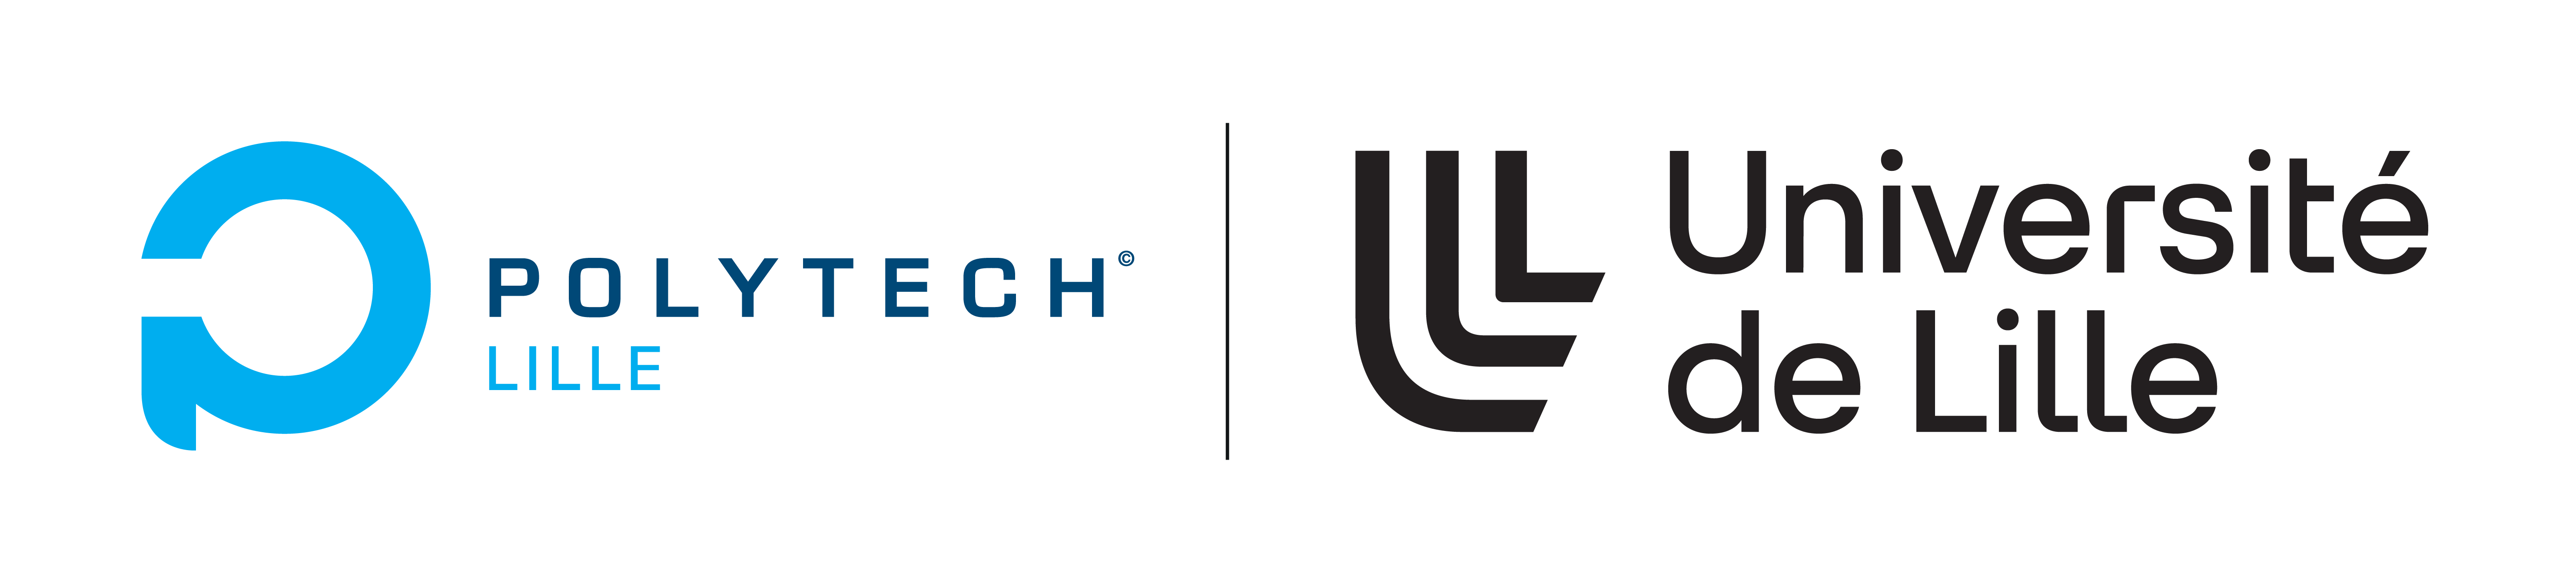

<p><CENTER>Elève:&emsp;MASSON KEVIN  <br>Enseignants:&emsp;PREDA,&ensp;GRIMONPREZ</CENTER></p>

<br><br><br><br>

## DEVOIR MAISON PCR-PLS-Ridge-Lasso

**Introduction**

L'objectif est de modéliser l’indice d’octane moteur de l’essence en fonction de son processus de fabrication.Ce processus de fabrication implique plusieurs composantes:<br><br>

• y = indice octane moteur<br>
• x1 = distilation directe (valeur comprise entre 0 et 0.21)<br>
• x2 = reformat (valeurs entre 0 et 0.62)<br>
• x3 = naphta de craquage termique (entre 0 et 0.12)<br>
• x4 = naphta de craquage cataitique (entre 0 et 0.62)<br>
• x5 = polymere (entre 0 et 0.12)<br>
• x6 = alkylat (entre 0 et 0.74)<br>
• x7 = essence naturelle (entre 0 et 0.08)<br><br>

Nous allons donc effectuer une analyse de régression linéaire et déterminer le meilleur modèle prédictif.


**Importation des packages nécessaires**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector
import statsmodels.api as sm

/home/k/m/kmasson/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.2' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/k/m/kmasson/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:59: UserWarning: Pandas requires version '1.3.2' or newer of 'bottleneck' (version '1.2.1' currently installed).
  from pandas.core import (


**Importation du jeu de données**

In [3]:
data = pd.read_csv("oct.csv", header = 0)
data

,X1,X2,X3,X4,X5,X6,X7,y
0,0.00,0.23,0.00,0.00,0.00,0.74,0.03,98.7
1,0.00,0.10,0.00,0.00,0.12,0.74,0.04,97.8
2,0.00,0.00,0.00,0.10,0.12,0.74,0.04,96.6
3,0.00,0.49,0.00,0.00,0.12,0.37,0.02,92.0
4,0.00,0.00,0.00,0.62,0.12,0.18,0.08,86.6
5,0.00,0.62,0.00,0.00,0.00,0.37,0.01,91.2
6,0.17,0.27,0.10,0.38,0.00,0.00,0.08,81.9
7,0.17,0.19,0.10,0.38,0.02,0.06,0.08,83.1
8,0.17,0.21,0.10,0.38,0.00,0.06,0.08,82.4
9,0.17,0.15,0.10,0.38,0.02,0.10,0.08,83.2


**Vérification du typage des variables**

Un premier point intéressant est de vérifier le typage de nos variables puisqu'il est nécessaire d'avoir un type : float64 afin de calculer l'indice d'octane (variable y).

In [4]:
data.dtypes

X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6    float64
X7    float64
y     float64
dtype: object

Le typage est donc correct, aucune modification n'est à faire.

**Statistiques déscriptives**

In [5]:
print(data.shape)
data.describe()

(12, 8)


,X1,X2,X3,X4,X5,X6,X7,y
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.074167,0.218333,0.043333,0.253333,0.043333,0.310833,0.056667,88.583333
std,0.092290,0.195533,0.053824,0.227010,0.057102,0.292900,0.027080,6.521271
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,81.400000
25%,0.000000,0.075000,0.000000,0.000000,0.000000,0.060000,0.037500,82.925000
50%,0.000000,0.200000,0.000000,0.315000,0.010000,0.275000,0.070000,87.350000
75%,0.170000,0.292500,0.100000,0.380000,0.120000,0.462500,0.080000,93.150000
max,0.210000,0.620000,0.120000,0.620000,0.120000,0.740000,0.080000,98.700000


**Statistiques bivariées**

In [6]:
data.corr()

,X1,X2,X3,X4,X5,X6,X7,y
X1,1.000000,0.104196,0.999859,0.370712,-0.547994,-0.804584,0.602612,-0.837296
X2,0.104196,1.000000,0.100777,-0.536864,-0.292573,-0.191247,-0.590028,-0.070819
X3,0.999859,0.100777,1.000000,0.374000,-0.548201,-0.805204,0.607080,-0.837958
X4,0.370712,-0.536864,0.374000,1.000000,-0.211330,-0.645656,0.915877,-0.706714
X5,-0.547994,-0.292573,-0.548201,-0.211330,1.000000,0.462923,-0.274356,0.493799
X6,-0.804584,-0.191247,-0.805204,-0.645656,0.462923,1.000000,-0.656356,0.985070
X7,0.602612,-0.590028,0.607080,0.915877,-0.274356,-0.656356,1.000000,-0.741116
y,-0.837296,-0.070819,-0.837958,-0.706714,0.493799,0.985070,-0.741116,1.000000


De fortes corrélations semblent exister dans ce jeu de données. C'est pourquoi il faudra faire attention à la multicolinéarité lors de notre régression.

### **I - Régression linéaire simple**

On sépare notre  tableau en 2 groupes :

In [7]:
X = data.iloc[:, 0:7]
y = data.iloc[:, 7]

Ensuite on entraine notre Regresson Linéaire.

In [8]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [9]:
lr.score(X,y)

0.9925265087993762

In [10]:
ypred = lr.predict(X)
mean_squared_error(y, ypred)

0.2913395226678727

Après ces 2 sorties, il semblerait que la régression linéaire ait de très bon résultat puisqu'on a un score élevé et un MSE proche de 0.

In [11]:
X2 = sm.add_constant(X)
lm2 = sm.OLS(y, X2)
res = lm2.fit()
res.summary()

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     110.7
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           3.76e-05
Time:                        11:37:14   Log-Likelihood:                -9.6277
No. Observations:                  12   AIC:                             33.26
Df Residuals:                       5   BIC:                             36.65
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.4559     16.271      4.945      0.004      38.629     122.282
X1           -46.1357    224.920     -0.205      0.846    -624.311     532.039
X2             5.4669     16.313      0.335      0.751     -36.468      47.402
X3            60.7960    359.847      0.169      0.872    -864.219     985.811
X4            -3.2758     15.570     -0.210      0.842     -43.301      36.749
X5             7.2943     15.841      0.460      0.665     -33.427      48.016
X6            19.8449     15.385      1.290      0.254     -19.704      59.394
X7            36.4654     88.639      0.411      0.698    -191.389     264.319
==============================================================================
Omnibus:                        2.986   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                1.354
Skew:                           0.822   Prob(JB):                        0.508
Kurtosis:                       3.073   Cond. No.                     3.52e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.18e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Cependant, en utilisant la méthode des moindres carrés ordinaires, on remarque une forte multicolinéarité. Ainsi, nous avons des valeurs propres proches de 0 rendant la calcule de la matrice (XT. X)-1. XT impossible ! Et donc rend faux notre modèle.

**Vérifier la présence de multicolinéarité**

Afin de vérifier l'hypothèse de multicolinéarité nous pouvons utiliser la méthode de l'ACP Normée, en effet la présence de composantes principales proches de 0 implique la présence de multicolinéarité.<br>
Nous allons vérifier cela :

In [12]:
scaler = StandardScaler(with_mean=False, with_std=True)
scaler.fit(X)
X_scaled = scaler.transform(X)
pca = PCA(n_components=X.shape[1])
pca.fit(X_scaled)
ratio = pca.explained_variance_ratio_
print(np.round(ratio*100,4))

[5.75075e+01 2.72908e+01 8.18040e+00 6.83110e+00 1.89100e-01 1.20000e-03
 0.00000e+00]


En effet le pourcentage de variance expliquée est faible pour certaine variable, de ce fait la présence de multicolinéarité est validée.


### **2 - Traiter la multicolinéarité**

#### A) Utilisation du Step AIC

Step AIC utilise un modèle en backward mode qui minimise la perte d'information en retirant les variables dont l'AIC associé est minimal.

In [13]:
### FONCTION PROPOSEE PAR M. GRIMONPEREZ EN COURS DE TD ###

def compute_AIC(n, mse, n_params):
    return n * np.log(mse) + 2 * n_params


def find_best_estimator(X, y, kept_variables, remaining_variables):
    aic = dict()
    for i in remaining_variables:
        current_variables = list(kept_variables) + [i]
        lm = LinearRegression().fit(X[:, current_variables], y)
        yhat = lm.predict(X[:, current_variables])
        mse = mean_squared_error(y, yhat)

        aic[i] = compute_AIC(len(y), mse, len(current_variables) + 1)

    best_var = min(aic.items(), key=operator.itemgetter(1))[0]
    best_AIC = aic[best_var]

    return best_AIC, best_var


def stepAIC(X, y):
    n, p = X.shape
    if isinstance(X, pd.DataFrame):
        X = X.values

    mse_null = mean_squared_error(y, np.full((n, ), y.mean()))
    aic_null = compute_AIC(len(y), mse_null, 1)

    best_AIC = aic_null
    current_AIC = 0
    kept_variables = set()
    remaining_variables = set(range(p))
    for i in range(1, p + 1):
        current_AIC, current_var = find_best_estimator(X, y, kept_variables, remaining_variables)

        if best_AIC < current_AIC:
            break
        else:
            best_AIC = current_AIC
            kept_variables.add(current_var)
            remaining_variables.remove(current_var)

    return list(kept_variables)

var= stepAIC(X,y)
print(X.columns[var])

Index(['X1', 'X4', 'X6', 'X7'], dtype='object')


Cela nous affiche les variables à garder afin d'éviter la multicolinéarité.

In [14]:
X3 = sm.add_constant(X.iloc[:, var])
lm3 = sm.OLS(y, X3)
res = lm3.fit()
res.summary()

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     228.1
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           1.72e-07
Time:                        11:37:14   Log-Likelihood:                -9.7379
No. Observations:                  12   AIC:                             29.48
Df Residuals:                       7   BIC:                             31.90
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.0372      1.010     85.166      0.000      83.648      88.426
X1           -22.4998      9.968     -2.257      0.059     -46.070       1.070
X4           -10.3535      5.976     -1.733      0.127     -24.484       3.777
X6            13.7820      2.770      4.976      0.002       7.232      20.332
X7            45.0686     48.573      0.928      0.384     -69.789     159.926
==============================================================================
Omnibus:                        1.626   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.444   Jarque-Bera (JB):                0.690
Skew:                           0.585   Prob(JB):                        0.708
Kurtosis:                       2.900   Cond. No.                         262.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On remarque un R-squared satisfaisant (0.99) et un test statistique de Fisher avec comme valeur de la p-value associée inférieur à 0.005 (le modèle explique significativement la variable de réponse y).<br>
L'avertissement de la présence de multicolinéarité n'est pas présente ici, ce qui caractérise l'utilité du Step AIC.

#### B) PCR

La méthode PCR le RMSEP via validation croisée pour chaque ensemble de variables explicatives. Ainsi il est possible de déterminer le nombre de composantes à retenir avec un RMSEP minimal.

In [15]:
pcr = {}
error_test_pcr = {}
error_train_pcr = {}
for n_comp in np.arange(1, X.shape[1] + 1):
    pcr[n_comp] = make_pipeline(StandardScaler(with_mean=False, with_std=True), PCA(n_components=n_comp), LinearRegression())
    cv = cross_validate(pcr[n_comp], X, y, scoring="neg_root_mean_squared_error", cv=X.shape[0], return_train_score=True)
    error_test_pcr[n_comp] = -np.mean(cv["test_score"])
    error_train_pcr[n_comp] = -np.mean(cv["train_score"])
minPCR = error_test_pcr[4]   


**Affichage graphique**

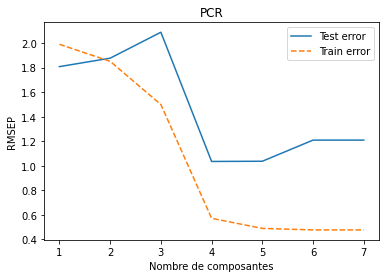

In [16]:
plt.plot(error_test_pcr.keys(), error_test_pcr.values(), label="Test error")
plt.plot(error_train_pcr.keys(), error_train_pcr.values(), ls="--", label="Train error")
plt.xlabel("Nombre de composantes")
plt.ylabel("RMSEP")
plt.title("PCR")
plt.legend()
plt.show()

Le minimum du RMSEP est atteint pour n_comp = 4. Ce résultat est en adéquation avec la méthode Step AIC réalisée précèdemment.

**Model de Régression Linéaire associé**

On obtient ainsi avec PCR le model de régression linéaire suivant :

In [17]:
n_comp = 4
pcr[n_comp].fit(X, y)
print("Beta 0 = ", pcr[n_comp].named_steps["linearregression"].intercept_, " les coefficients sont : ", pcr[n_comp].named_steps["linearregression"].coef_)

Beta 0 =  88.58333333333333  les coefficients sont :  [ 2.94720113  0.456033    0.88675531 -2.42049301]


#### C) PLS

La methode PLS (*Partial Least Squares*) est sensiblement la même que PCR et s'appuie sur la maximisation de la covariance carrée entre t (un modèle de regression) et Y (Critère de Tucker) sous la contrainte que la somme des coefficient de t au carrée soient egale à 1.

In [18]:
pls = {}
error_test_pls = {}
error_train_pls = {}
for n_comp in np.arange(1, X.shape[1] + 1):
    pls[n_comp] = PLSRegression(n_components=n_comp)
    cv = cross_validate(pls[n_comp], X, y, scoring="neg_root_mean_squared_error", cv=X.shape[0], return_train_score=True)
    error_test_pls[n_comp] = -np.mean(cv["test_score"])
    error_train_pls[n_comp] = -np.mean(cv["train_score"])

error_test_pls.pop(6)
error_test_pls.pop(7)

error_train_pls.pop(6)
error_train_pls.pop(7)

error_test_pls

{1: 1.6585919675033374,
 2: 1.3128828605538736,
 3: 0.9947233676499477,
 4: 1.037174791593208,
 5: 1.0352437820949387}

**Affichage graphique**

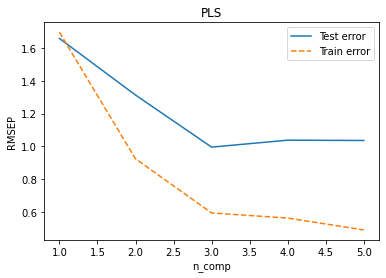

In [19]:
plt.plot(error_test_pls.keys(), error_test_pls.values(), label="Test error")
plt.plot(error_train_pls.keys(), error_train_pls.values(), ls="--", label="Train error")
plt.xlabel("n_comp")
plt.ylabel("RMSEP")
plt.title("PLS")
plt.legend()
plt.show()

On peut alors retenir 3 composantes pour la méthode PLS, puisque le RMSEP est atteint pour n_comp = 3.

**Model de Régression Linéaire associé**

On obtient ainsi avec PCR le model de régression linéaire suivant :

In [20]:
n_comp = 3
pls[n_comp].fit(X, y)
print("Beta 0 = ", pls[n_comp].intercept_," les coefficients sont : ",pls[n_comp].coef_.T)

Beta 0 =  [88.58333333]  les coefficients sont :  [[-0.90705439 -1.36094835 -0.8970354  -1.91182953 -0.25061566  2.9762416
  -0.93504863]]


/home/k/m/kmasson/.local/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


#### D) Régression Ridge

Les methodes Ridge et Lasson sont des modèles de regression à penalités. Les pénalités concernent la somme des carrées des coefficients des variables explicatives ($\beta$<sub>i</sub>) multiplié par $\alpha$, un hyperparamètre et la somme des valeurs absolues des coefficients ($\beta$<sub>i</sub>) multipliée par $\alpha$.

Pour déterminer l'hyperparamètre on effectue une *cross-validation*.

In [21]:
ridge = RidgeCV(alphas=np.arange(0.1, 100000, 1), store_cv_values=True)
ridge.fit(X, y)
ridge.alpha_

0.1

On prend alors $\alpha$ = 0.1.

In [22]:
ridge.cv_values_.shape

(12, 100000)

**Affichage graphique**

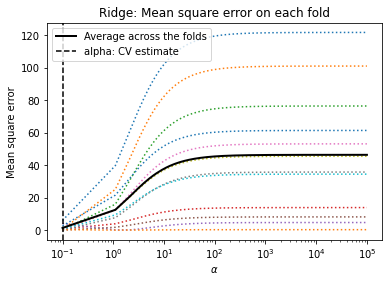

In [23]:
plt.figure()
plt.semilogx(ridge.alphas, ridge.cv_values_.T, ":")
plt.plot(ridge.alphas, ridge.cv_values_.mean(axis=0), "black",
         label="Average across the folds", linewidth=2)
plt.axvline(ridge.alpha_, linestyle="--", color="black",
            label="alpha: CV estimate")
plt.legend()
plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.title("Ridge: Mean square error on each fold")
plt.show()

Ce graphique montre l'évolution du MSE par rapport à la valeur de alpha pour chaque fold.

**Calcul de RMSEP**

In [24]:
ridge_best = Ridge(alpha=ridge.alpha_)
ridge_best.fit(X, y)
np.sqrt(-cross_val_score(ridge_best, X, y, cv=X.shape[0], scoring="neg_root_mean_squared_error").mean())

0.9617662128837815

La valeur du MRSEP est très importante avec cette méthode en comparaisont avec les méthodes précèdentes.

**Model de Régression Linéaire associé**

In [25]:
print("Beta 0 = ", ridge_best.intercept_, " les coéfficients sont ", ridge_best.coef_)

Beta 0 =  86.10810421433607  les coéfficients sont  [-5.9704494  -0.91265734 -3.46906838 -5.72295063  2.0179383  15.08232188
 -1.02513441]


#### E) Régression Lasso

In [26]:
lasso = LassoCV(cv=X.shape[0])
lasso.fit(X, y)

LassoCV(cv=12)

On obtient les valeurs de $\alpha$ suivant :

In [27]:
lasso.alpha_

0.03715891154336521

**Affichage graphique**

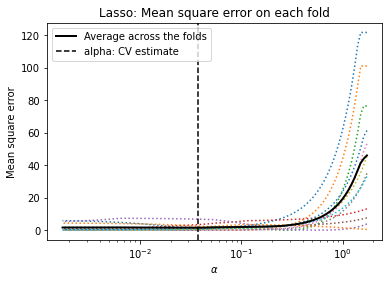

In [28]:
plt.figure()
plt.semilogx(lasso.alphas_, lasso.mse_path_, ":")
plt.plot(lasso.alphas_, lasso.mse_path_.mean(axis=-1), "black",
         label="Average across the folds", linewidth=2)
plt.axvline(lasso.alpha_, linestyle="--", color="black",
            label="alpha: CV estimate")
plt.legend()
plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.title("Lasso: Mean square error on each fold")
plt.show()

**Calcul de RMSEP**

In [29]:
lasso_best = Lasso(alpha=lasso.alpha_)
lasso_best.fit(X, y)
np.sqrt(-cross_val_score(lasso_best, X, y, cv=X.shape[0], scoring="neg_root_mean_squared_error").mean())

0.9902803887341789

### **3 - Conclusion**

En conclusion de ce Devoir, de nombreuses méthodes existent afin d'analyser et éviter la multicolinéarité. Parmis les différentes méthode que l'on a appliqué, la méthode Ridge est ici la plus adaptée avec un RMSEP le plus bas.